##Library Import

In [ ]:
import pandas as pd
from sklearn.neighbors import KernelDensity
import seaborn as sns
import pylab
from matplotlib import rcParams
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
from sklearn.neighbors import KernelDensity
from numpy import exp
from numpy import asarray
from matplotlib.ticker import PercentFormatter
from google.colab import files
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# figure size in inches
rcParams['figure.figsize'] = 16,8
sns.set_style("darkgrid")

###Select Sensor

In [ ]:
sensor_id = 'ssd_05500B'

##Data Preprocessing

In [ ]:
df = pd.read_csv(f'/content/drive/MyDrive/UTS/Hass-DSI/Device Data/Device Data (Updated)/{sensor_id}.csv')
df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%d %H:%M:%S')
df = df.resample('H', on='ts').agg({'p':'median','t':'median','h':'median','als':'median','uv':'median','voc':'median','pm1':'median','pm25':'median','pm10':'median', 'People Count':'median'})
df.reset_index(inplace=True)
df['Hour'] = pd.DatetimeIndex(df['ts']).hour.astype(int)
df['Weekday'] = pd.DatetimeIndex(df['ts']).weekday

In [ ]:
x,y = list(),list()

for i in range(0,len(df)):
  if 6 <= df['Hour'].iloc[i] < 18:
    x.append('A/C On')
  else:
    x.append('A/C Off')

for i in range(0,len(df)):
  if df['Weekday'].iloc[i] > 4:
    y.append('Weekend')
  else:
    y.append('Weekday')

df['AC Status'] = x
df['Day Type'] = y

In [ ]:
ds = df[df['Day Type'] == 'Weekday']

###PDF Function

In [ ]:
def PDF(sensor,label):
  model = KernelDensity(bandwidth=4, kernel='gaussian')
  sample = (np.array(ds[f'{sensor}']).reshape((len(ds[f'{sensor}']), 1)))
  model.fit(sample)

  values = asarray([value for value in range(int(ds[f'{sensor}'].describe()[3]), int(ds[f'{sensor}'].describe()[7]))])
  values = values.reshape((len(values), 1))
  probabilities = model.score_samples(values)
  probabilities = exp(probabilities)

  ax = sns.histplot(data=ds, weights=(np.ones(len(sample)) / len(sample))*100, bins=10, x = sensor, hue='AC Status', multiple='stack')
  #plt.plot(values[:], probabilities)
  plt.xlim(int(ds[f'{sensor}'].describe()[3])-1,int(ds[f'{sensor}'].describe()[7])+1)
  plt.xlabel(f"{label}")
  plt.ylabel("Frequency (Percentage %)")
  plt.title("Hourly Probability Density Function")

##Results

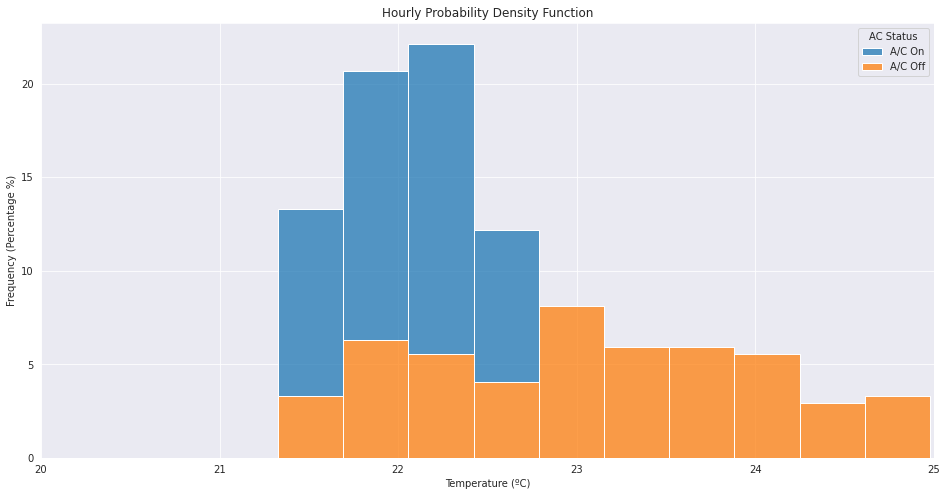

In [ ]:
PDF('t','Temperature (ºC)')

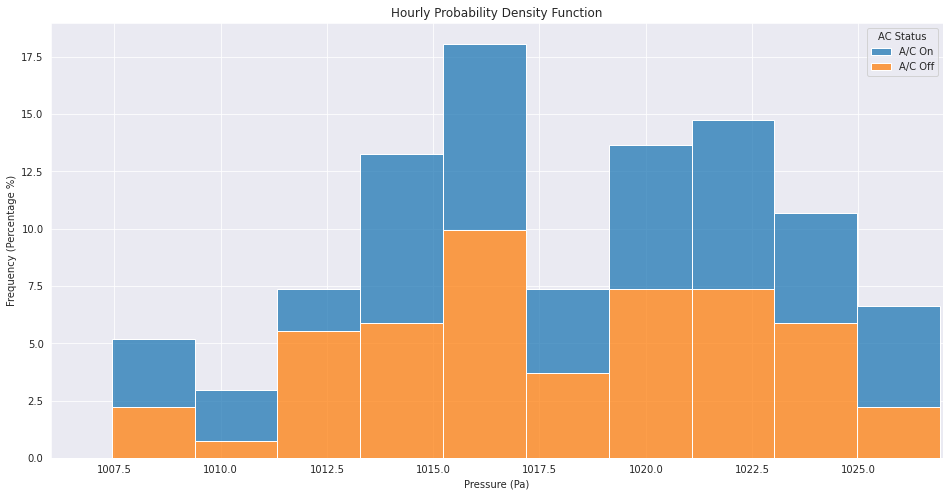

In [ ]:
PDF('p','Pressure (Pa)')

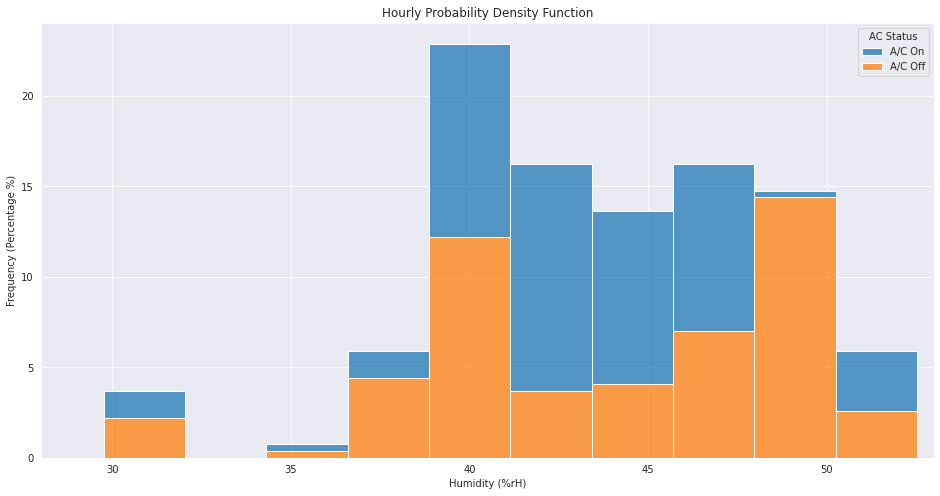

In [ ]:
PDF('h','Humidity (%rH)')

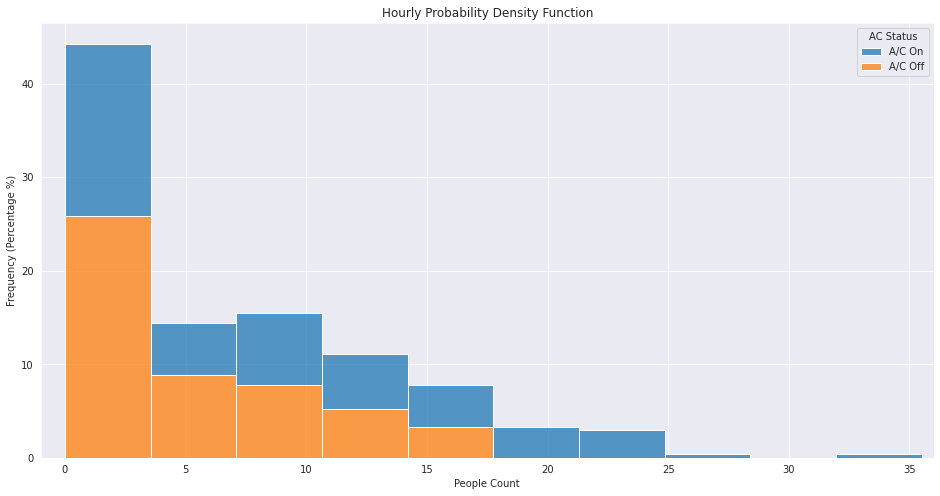

In [ ]:
PDF('People Count','People Count')

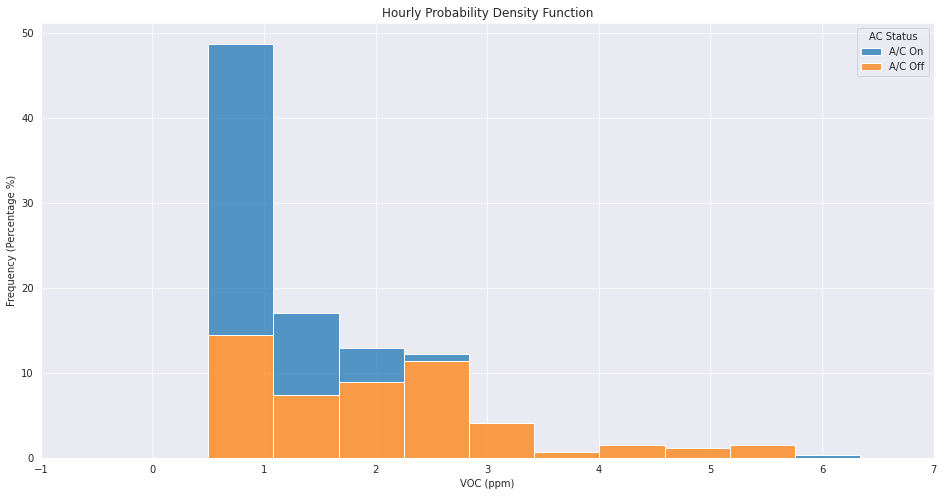

In [ ]:
PDF('voc','VOC (ppm)')

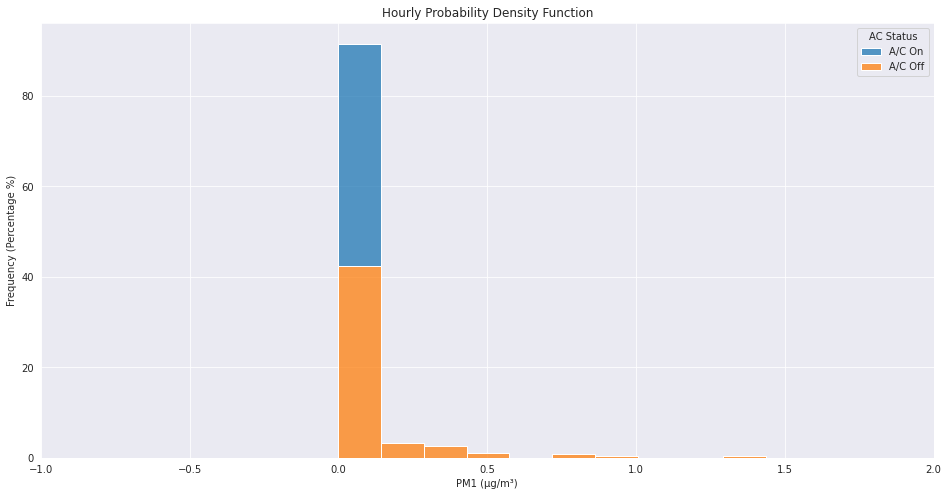

In [ ]:
PDF('pm1','PM1 (µg/m³)')

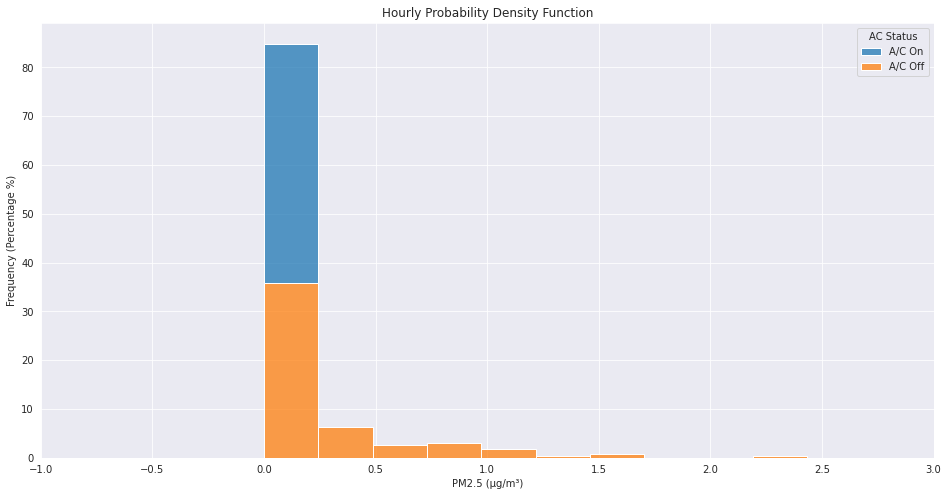

In [ ]:
PDF('pm25','PM2.5 (µg/m³)')

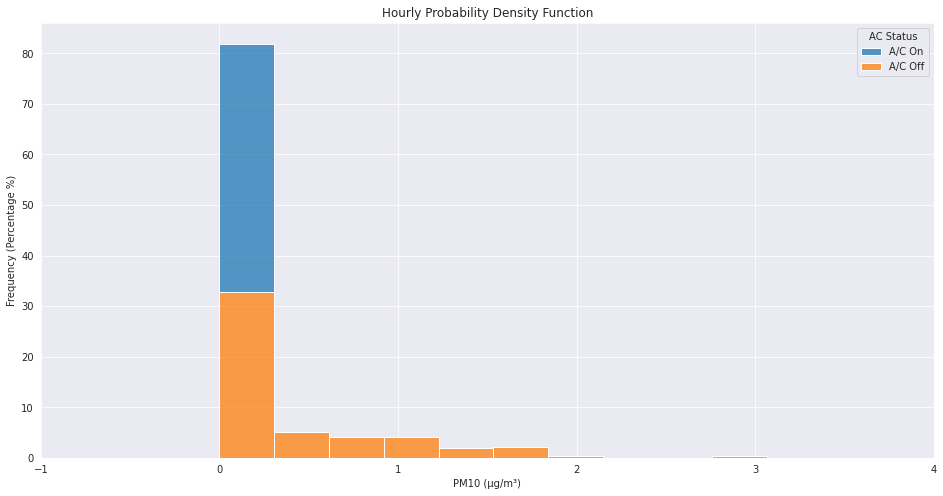

In [ ]:
PDF('pm10','PM10 (µg/m³)')